# IT001 — PCA

Run this notebook to perform your assigned preprocessing step. Visuals are shown and outputs saved under `results/outputs/`.

Loaded: (890000, 16)
Numeric columns for PCA: ['age', 'bmi', 'cholesterol_level']


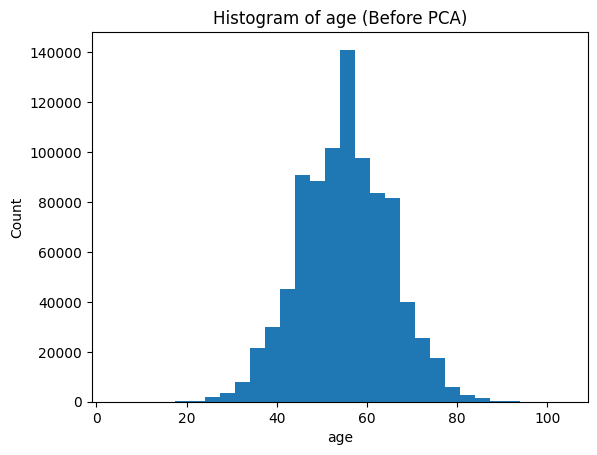

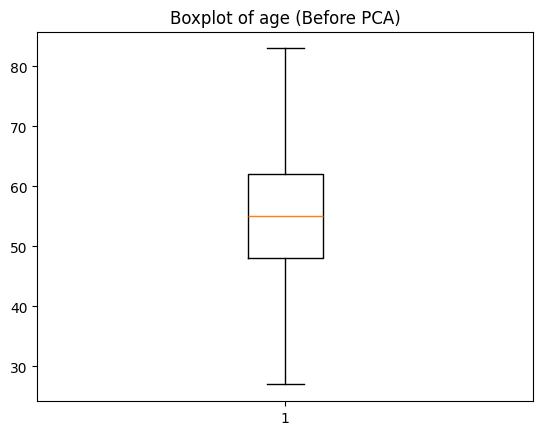

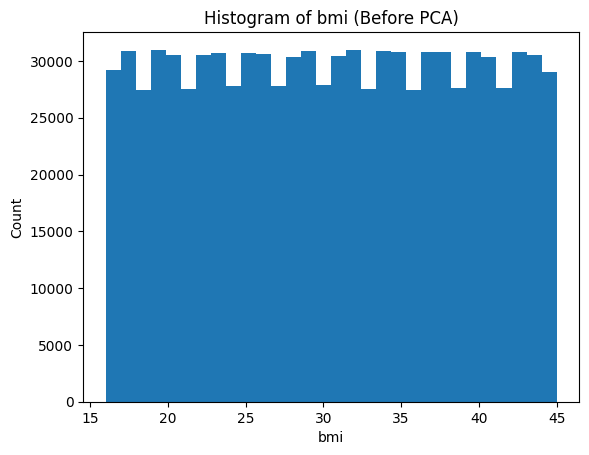

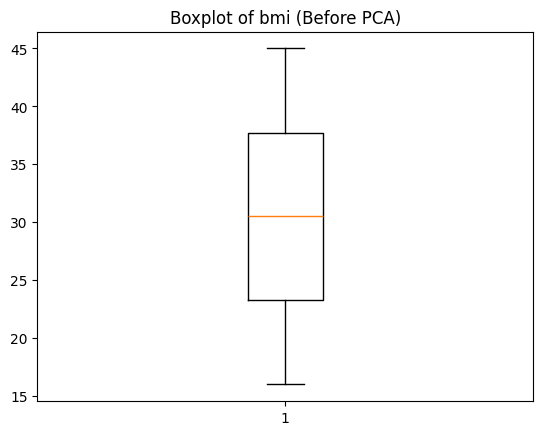

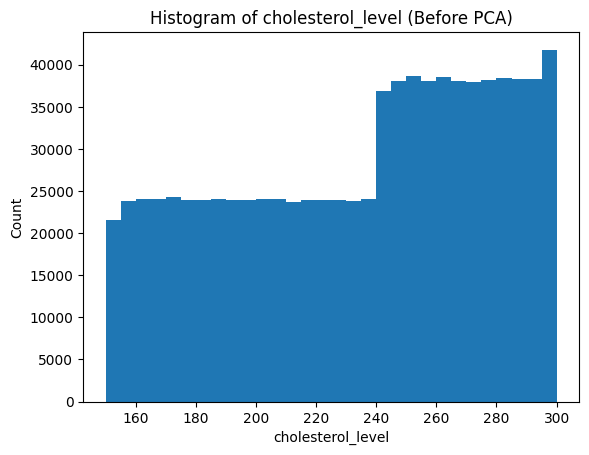

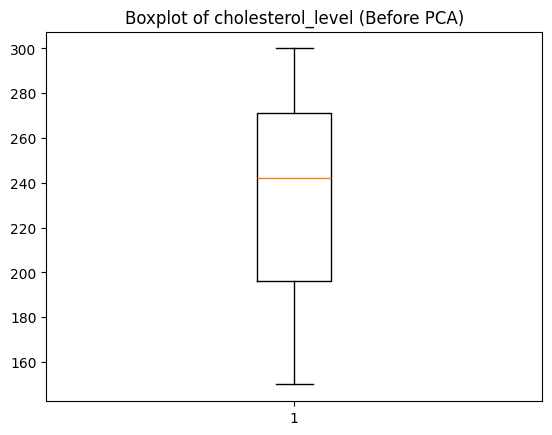

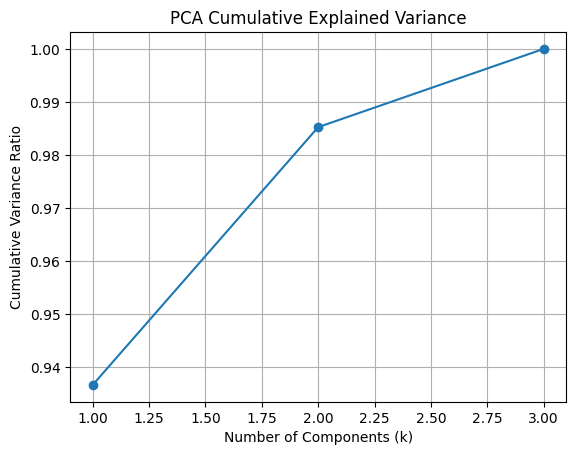

Saved PCA features -> C:\Users\user\Desktop\Sinoli\raw\pca_features.csv


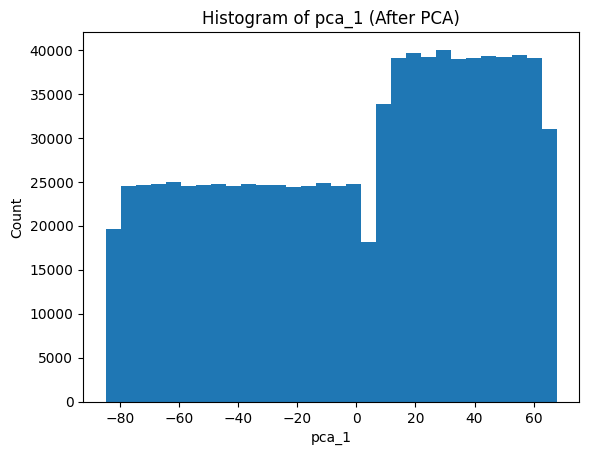

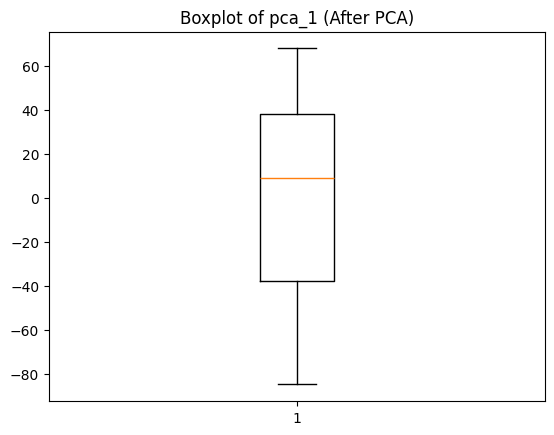

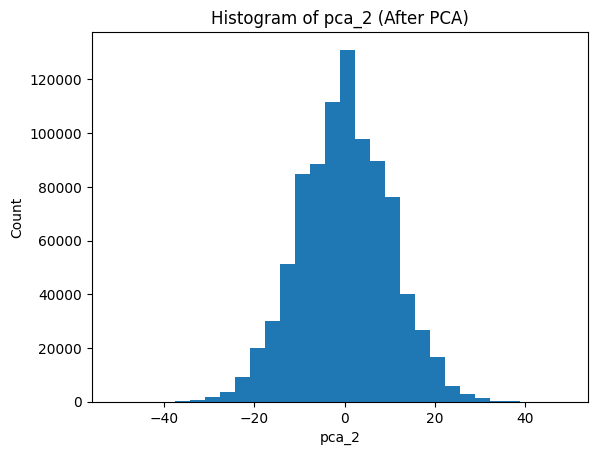

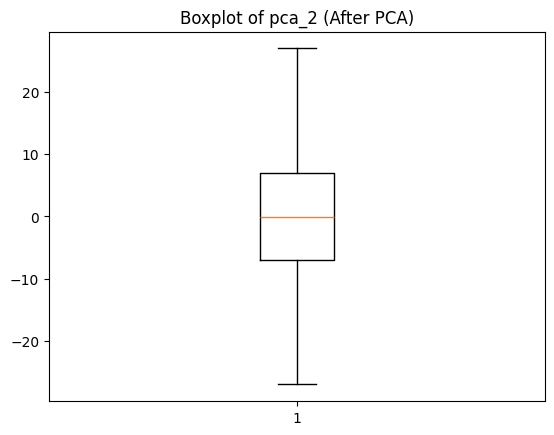

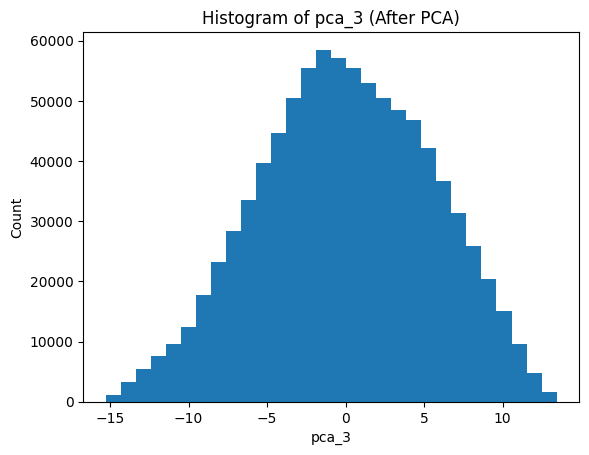

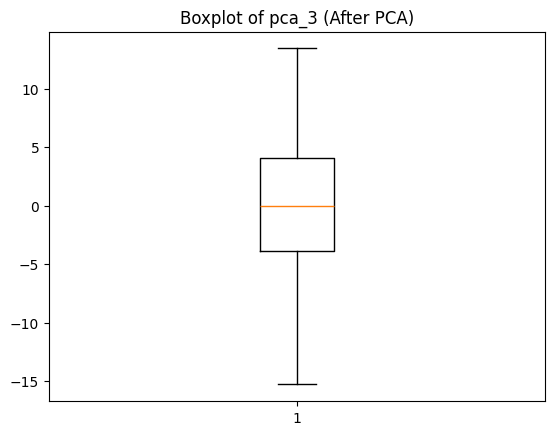

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Load Dataset

DATA_PATH = "C:\\Users\\user\\Desktop\\Sinoli\\raw\\Lung Cancer.csv"
df = pd.read_csv(DATA_PATH).drop(columns=["id"], errors="ignore")
print("Loaded:", df.shape)


# Visualization Helper Functions

def safe_hist(series, title, bins=30):
    """Plots histogram if the series is numeric."""
    plt.figure()
    s = pd.to_numeric(series, errors="coerce").dropna()
    if len(s) == 0:
        plt.title(f"{title} (no numeric data)")
        plt.show()
        return
    plt.hist(s, bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Count")
    plt.show()

def boxplot(series, title):
    """Plots a simple boxplot for numeric series."""
    plt.figure()
    s = pd.to_numeric(series, errors="coerce").dropna()
    if len(s) == 0:
        plt.title(f"{title} (no numeric data)")
        plt.show()
        return
    plt.boxplot(s, showfliers=False)
    plt.title(title)
    plt.show()


# Step 1: Identify Numeric Columns

num_all = [c for c in [
    "age","bmi","cholesterol_level","diagnosis_year","diagnosis_month",
    "treatment_length_days","comorbidity_count","ever_smoked","passive_exposure"
] if c in df.columns]

print("Numeric columns for PCA:", num_all)


# Step 2: Visualize BEFORE PCA

for col in num_all:
    safe_hist(df[col], f"Histogram of {col} (Before PCA)")
    boxplot(df[col], f"Boxplot of {col} (Before PCA)")


# Step 3: Apply PCA

k = min(5, len(num_all)) if len(num_all) else 0
if k == 0:
    print("No numeric columns for PCA.")
    X_pca = pd.DataFrame(index=df.index)
else:
    pca = PCA(n_components=k).fit(df[num_all].dropna())   # dropna() ensures PCA runs
    X_pca = pd.DataFrame(
        pca.transform(df[num_all].fillna(0)),  # replace NaNs with 0 for transform
        columns=[f"pca_{i+1}" for i in range(k)],
        index=df.index
    )

    # Plot cumulative explained variance
    cum = (pca.explained_variance_ratio_).cumsum()
    plt.figure()
    plt.plot(range(1, len(cum)+1), cum, marker="o")
    plt.grid()
    plt.title("PCA Cumulative Explained Variance")
    plt.xlabel("Number of Components (k)")
    plt.ylabel("Cumulative Variance Ratio")
    plt.show()

# Save PCA features
X_pca.to_csv("C:\\Users\\user\\Desktop\\Sinoli\\raw\\pca_features.csv", index=False)
print("Saved PCA features -> C:\\Users\\user\\Desktop\\Sinoli\\raw\\pca_features.csv")


# Step 4: Visualize AFTER PCA

if not X_pca.empty:
    for col in X_pca.columns:
        safe_hist(X_pca[col], f"Histogram of {col} (After PCA)")
        boxplot(X_pca[col], f"Boxplot of {col} (After PCA)")
